In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with = engine)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [13]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date)\
                          .order_by(Measurement.date.desc())\
                          .first()[0]
most_recent_date

'2017-08-23'

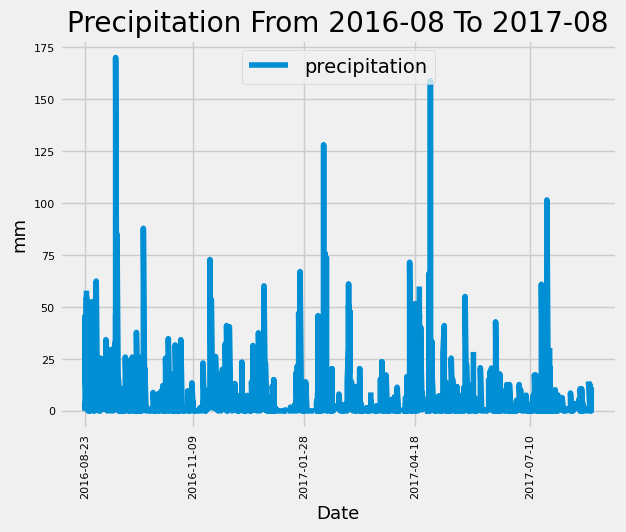

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
latest_date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
year_ago_date = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp)\
                              .filter(Measurement.date >= year_ago_date)\
                              .order_by(Measurement.date)\
                              .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_scores, columns =['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df.set_index(precipitation_df['date'], inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precipitation_df['date'], precipitation_df['precipitation'])
plt.title('Precipitation From 2016-08 To 2017-08')
plt.xlabel('Date', size = 13)
plt.ylabel('mm', size = 13)
plt.xticks(['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'], rotation=90, size = 8)
plt.yticks(size = 8)
plt.legend(['precipitation'], loc = 'upper center')
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
station_numbers = session.query(Station.station).count()
station_numbers

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activate_stations = session.query(Measurement.station, func.count(Measurement.station))\
                           .group_by(Measurement.station)\
                           .order_by(func.count(Measurement.station).desc())\
                           .all()
activate_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
statistics_temperature = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                                .filter(Measurement.station == 'USC00519281')\
                                .all()

statistics_temperature

[(12.2, 29.4, 22.03582251082252)]

In [33]:
tobs_data = session.query(Measurement.date, Measurement.tobs) \
                  .filter(Measurement.station == 'USC00519281') \
                  .filter(Measurement.date >= year_ago_date) \
                  .all()

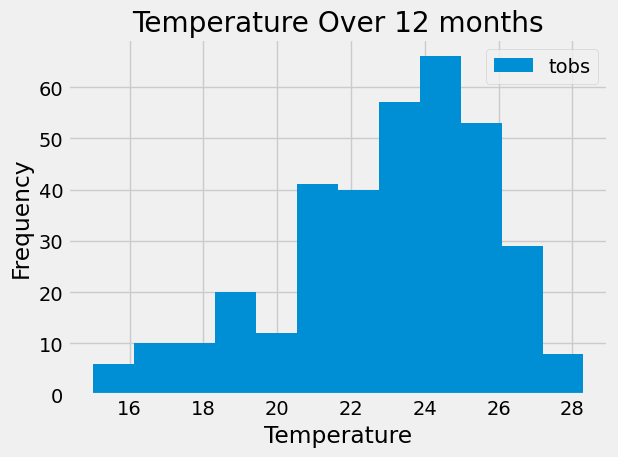

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_statistics_temperature = session.query(Measurement.tobs)\
                                     .filter(Measurement.station == 'USC00519281')\
                                     .filter(Measurement.date >= year_ago_date)\
                                     .all()

temperature_df = pd.DataFrame(year_statistics_temperature, columns=['tobs'])
plt.hist(temperature_df, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Over 12 months')
plt.tight_layout()
plt.legend(['tobs'], loc = 'upper right')
plt.show()

# Close Session

In [37]:
# Close Session
session.close()
